# Heart Disease UCI Dataset

## Overview

The "Heart Disease UCI" dataset is a collection of medical data related to the presence or absence of heart disease. The dataset is commonly used for machine learning and statistical analysis to predict heart disease based on various patient attributes.

## Variables

1. **age:**
   - *Description:* Age of the patient.
   - *Data Type:* Numeric.

2. **sex:**
   - *Description:* Gender of the patient.
   - *Data Type:* Categorical (1 = male, 0 = female).

3. **cp (chest pain type):**
   - *Description:* Type of chest pain the patient is experiencing.
   - *Data Type:* Categorical.
   - *Values:* 
     - 0: Typical angina
     - 1: Atypical angina
     - 2: Non-anginal pain
     - 3: Asymptomatic

4. **trestbps (resting blood pressure):**
   - *Description:* Resting blood pressure of the patient (in mm Hg).
   - *Data Type:* Numeric.

5. **chol (serum cholesterol):**
   - *Description:* Serum cholesterol level of the patient (in mg/dl).
   - *Data Type:* Numeric.

6. **fbs (fasting blood sugar):**
   - *Description:* Fasting blood sugar level.
   - *Data Type:* Categorical (1 = greater than 120 mg/dl, 0 = otherwise).

7. **restecg (resting electrocardiographic results):**
   - *Description:* Resting electrocardiographic results.
   - *Data Type:* Categorical.
   - *Values:*
     - 0: Normal
     - 1: Having ST-T wave abnormality
     - 2: Showing probable or definite left ventricular hypertrophy

8. **thalach (maximum heart rate achieved):**
   - *Description:* Maximum heart rate achieved during exercise.
   - *Data Type:* Numeric.

9. **exang (exercise-induced angina):**
   - *Description:* Whether the patient experienced exercise-induced angina.
   - *Data Type:* Categorical (1 = yes, 0 = no).

10. **oldpeak (ST depression induced by exercise relative to rest):**
    - *Description:* ST depression induced by exercise relative to rest.
    - *Data Type:* Numeric.

11. **slope (slope of the peak exercise ST segment):**
    - *Description:* Slope of the peak exercise ST segment.
    - *Data Type:* Categorical.
    - *Values:*
      - 0: Upsloping
      - 1: Flat
      - 2: Downsloping

12. **ca (number of major vessels colored by fluoroscopy):**
    - *Description:* Number of major vessels colored by fluoroscopy.
    - *Data Type:* Numeric.

13. **thal:**
    - *Description:* Thalassemia.
    - *Data Type:* Categorical.
    - *Values:*
      - 0: Normal
      - 1: Fixed defect
      - 2: Reversible defect

14. **target:**
    - *Description:* Presence or absence of heart disease.
    - *Data Type:* Categorical (1 = presence, 0 = absence).

** Chest Pain Types (cp) in "Heart Disease UCI" Dataset

The variable "cp" in this dataset represents different categories for chest pain types. Below is an explanation of each category:

 **0: Typical Angina**
   - *Description:* Chest pain that is typical or characteristic. It is often described as discomfort or pressure in the chest, triggered by physical exertion or stress, and tends to improve with rest or nitroglycerin.

 **1: Atypical Angina**
   - *Description:* Chest pain that deviates from the typical pattern of classic angina. It may be less pronounced, with varying characteristics. It might not be triggered by exertion or stress, and relief with rest or medication may not be as clear.

 **2: Non-Anginal Pain**
   - *Description:* Chest discomfort or pain that is not related to angina. This category includes a broader range of chest pain with different potential causes, such as musculoskeletal issues, respiratory problems, or other non-cardiac sources.

 **3: Asymptomatic**
   - *Description:* Absence of chest pain symptoms. A value of 3 in the "cp" variable indicates that the patient is not experiencing any chest pain or discomfort.

Understanding the type of chest pain is crucial for assessing and diagnosing cardiovascular conditions. The "cp" variable provides insights into the nature of chest pain experienced by patients in the dataset.


# ***Goal for this Analysis***

1. What age group is most vulnerable or has a large number of patients with a higher risk of heart attack?
2. Are men mostly prone to heart attacks or women?
3. What chest pain types pose a severe risk of a heart attack?
4. How fasting blood sugar is related to heart attack?
5. Due to cholesterol, how many patients are at higher risk?
6. What is the cross-relation between continuous features?

In [13]:
#Importing libraries for this Project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Reading the Dataset
df = pd.read_csv('heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [15]:
#Displaying all the values of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#Showing all the values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# ***Data Cleaning and Preparing***

### ***Remove all the unwanted columns***

In [17]:
#Showing all the columns available
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
#Removing unwanted columns
df = df.drop(['trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'], axis = 1)
df.head()

,age,sex,cp,chol,fbs,thal,target
0,52,1,0,212,0,3,0
1,53,1,0,203,1,3,0
2,70,1,0,174,0,3,0
3,61,1,0,203,0,3,0
4,62,0,0,294,1,2,0


### ***Checking for NULL value and duplicate value and cleaning it***

In [19]:
df.isnull().sum()

age       0
sex       0
cp        0
chol      0
fbs       0
thal      0
target    0
dtype: int64

# ***1. What age group is most vulnerable or has a large number of patients with a higher risk of heart attack?***

In [20]:
df['target'].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

<Figure size 1500x600 with 0 Axes>

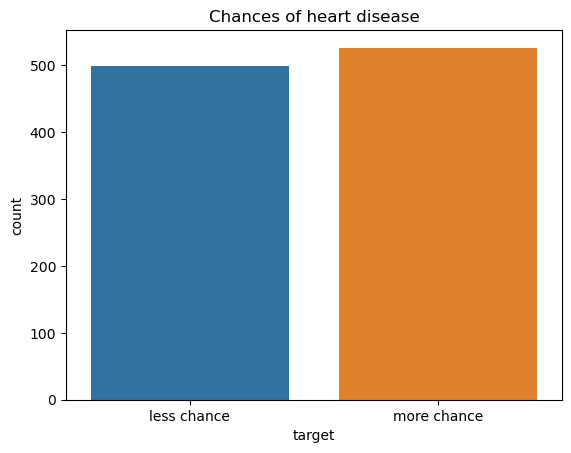

<Figure size 1500x600 with 0 Axes>

In [21]:
sns.countplot(x='target',data=df)
plt.xticks([0,1],['less chance','more chance'])
plt.title('Chances of heart disease')
plt.figure(figsize=(15,6))

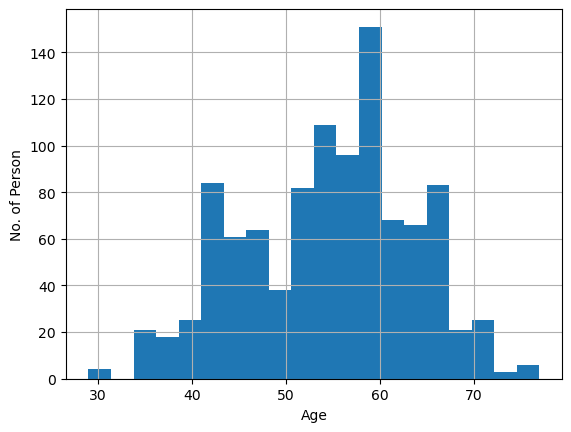

In [22]:
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('No. of Person')
plt.show()

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


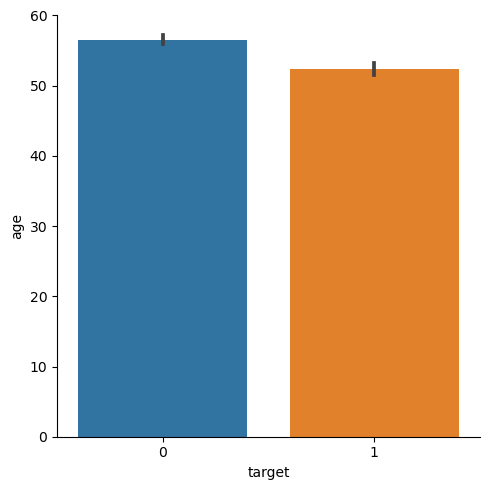

In [23]:
sns.catplot(x="target", y="age",kind="bar",data=df);

# ***2. Are men mostly prone to heart attacks or women?***

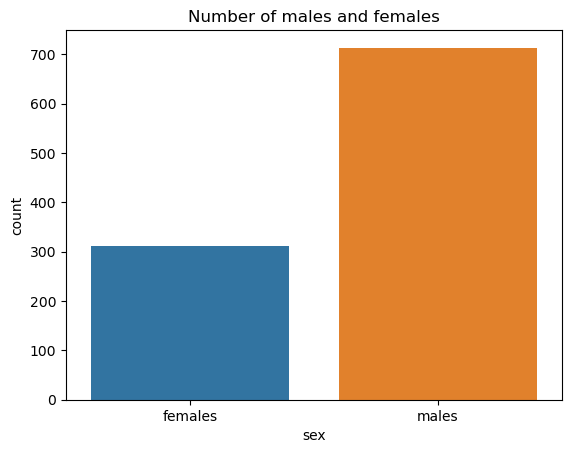

In [24]:
sns.countplot(x='sex',data=df  )
plt.title('Number of males and females')
plt.xticks([0,1] , ['females','males'])
plt.show()

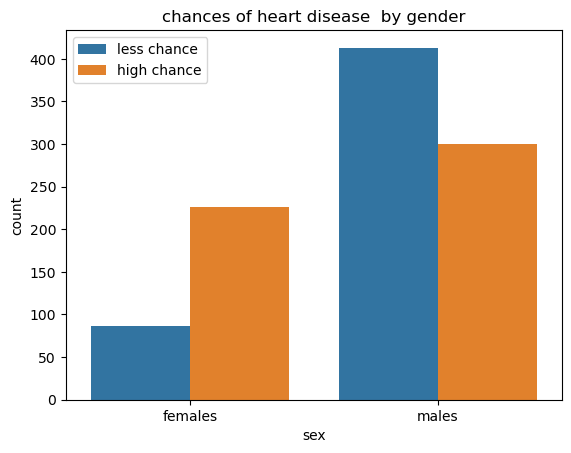

In [25]:
sns.countplot(x='sex',data=df, hue ='target'  )
plt.title('chances of heart disease  by gender')
plt.xticks([0,1] ,['females','males'])
plt.legend(labels=['less chance','high chance'])

# ***3. What chest pain types pose a severe risk of a heart attack?***

Text(0, 0.5, 'No. of Person')

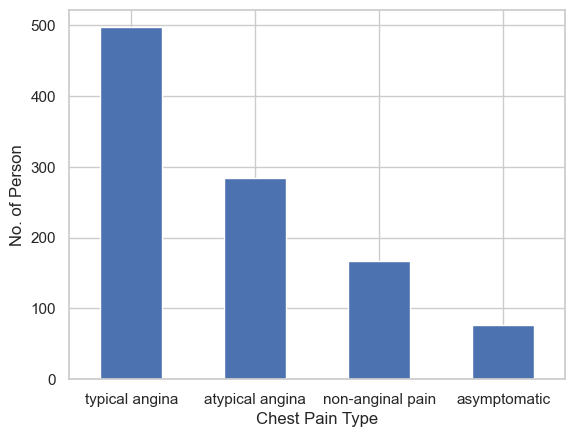

In [35]:
df['cp'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=0)
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Person')

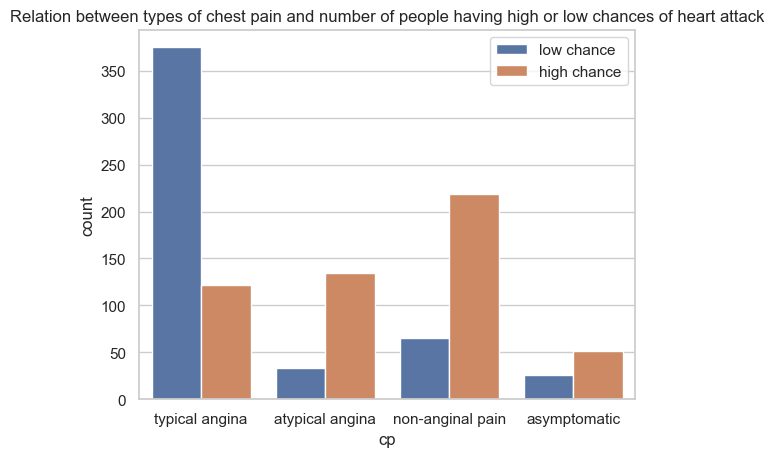

In [36]:
sns.countplot(x='cp',hue='target',data=df)

# formatting the plot

plt.title('Relation between types of chest pain and number of people having high or low chances of heart attack')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.legend(labels=['low chance','high chance'])

In [41]:
import pandas as pd
import seaborn as sns
cp_types=["typical angina","atypical angina","non-anginal pain","asymptomatic"]

# Custom function to calculate relative risk
def calculate_relative_risk(count_1, count_0):
    return count_1 / count_0

# Calculate the relative risk and store the results in a table
table = pd.crosstab(df['cp'], df['target'])
relative_risk_table = pd.DataFrame(index=cp_types, columns=['RelativeRisk'])

for cp_type in table.index:
    rr = calculate_relative_risk(table.loc[cp_type, 1], table.loc[cp_type, 0])
    relative_risk_table.loc[cp_types[cp_type], 'RelativeRisk'] = rr

# Print the relative risk table
print(relative_risk_table)


                 RelativeRisk
typical angina       0.325333
atypical angina      4.060606
non-anginal pain     3.369231
asymptomatic         1.961538


In [40]:
table

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


In [30]:
print(table)

target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51


# ***4. How fasting blood sugar is related to heart attack?***

### ***Fasting blood sugar is the lowest amount of glucose present in the blood , when we have not eaten or drunk anything. Blood sugar level greater than 120 mg/dl is considered diabetic.***

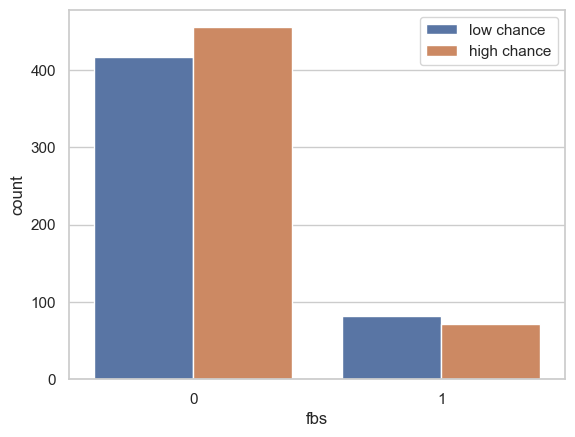

In [42]:
sns.countplot(x='fbs' , hue='target',data=df)
plt.legend(labels=['low chance','high chance'])

# ***5. Due to cholesterol, how many patients are at higher risk?***

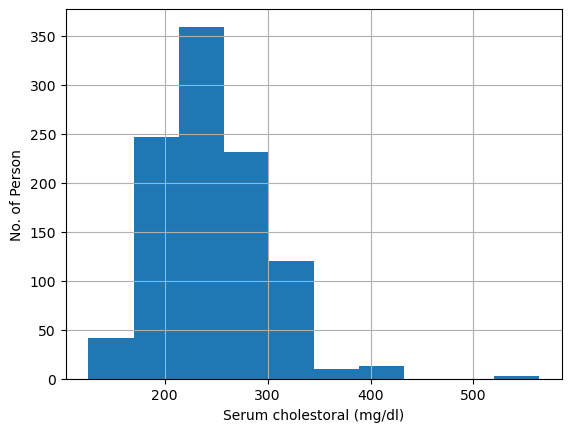

In [32]:
df['chol'].hist()
plt.xlabel('Serum cholestoral (mg/dl)')
plt.ylabel('No. of Person')
plt.show()

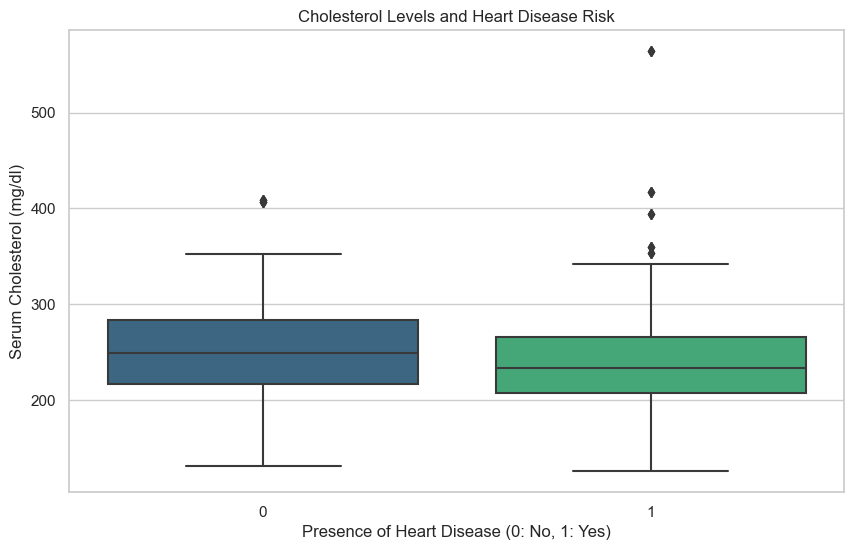

In [33]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot to compare cholesterol levels for patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='viridis')
plt.title('Cholesterol Levels and Heart Disease Risk')
plt.xlabel('Presence of Heart Disease (0: No, 1: Yes)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()